In [9]:
import pandas as pd
with open("005_results.jsonl", "r") as f:
    contents = f.readlines()
from ast import literal_eval
contents = [literal_eval(i) for i in contents]

df = pd.DataFrame(data=contents)
df

,macroF1,y_true,y_pred,train_split,eval_split,model_name
0,0.802403,"[Negative, Negative, Negative, Positive, Negat...","[Negative, Negative, Negative, Positive, Negat...",train,test,classla/bcms-bertic
1,0.844409,"[Neutral, Negative, Neutral, Neutral, Neutral,...","[Neutral, Negative, Neutral, Neutral, Neutral,...",train,test_HR,classla/bcms-bertic
2,0.741270,"[Positive, Negative, Neutral, Negative, Negati...","[Negative, Negative, Neutral, Negative, Negati...",train,test_SRB,classla/bcms-bertic
3,0.777142,"[Negative, Negative, Negative, Positive, Negat...","[Negative, Negative, Negative, Positive, Negat...",train,test,classla/bcms-bertic
4,0.801121,"[Neutral, Negative, Neutral, Neutral, Neutral,...","[Neutral, Positive, Neutral, Neutral, Neutral,...",train,test_HR,classla/bcms-bertic
5,0.743624,"[Positive, Negative, Neutral, Negative, Negati...","[Positive, Negative, Neutral, Negative, Neutra...",train,test_SRB,classla/bcms-bertic
6,0.774706,"[Negative, Negative, Negative, Positive, Negat...","[Negative, Negative, Negative, Positive, Negat...",train,test,classla/bcms-bertic
7,0.799813,"[Neutral, Negative, Neutral, Neutral, Neutral,...","[Neutral, Neutral, Neutral, Neutral, Neutral, ...",train,test_HR,classla/bcms-bertic
8,0.736905,"[Positive, Negative, Neutral, Negative, Negati...","[Negative, Negative, Neutral, Negative, Negati...",train,test_SRB,classla/bcms-bertic
9,0.792206,"[Negative, Negative, Negative, Positive, Negat...","[Negative, Negative, Negative, Positive, Negat...",train,test,classla/bcms-bertic


In [6]:
import numpy as np

C_trained_on_train = df.train_split == "train"
C_evaled_on_test = df.eval_split == "test"
from typing import Iterable
def macroF1_stats(i: Iterable[float]) -> str:
    return f"{np.mean(i):0.4f} ± {np.std(i):0.4f}"
df[C_trained_on_train 
# & C_evaled_on_test
].groupby("eval_split").agg(
    [macroF1_stats, len]
).sort_values(by=("macroF1","macroF1_stats"), ascending=False)


macroF1     
              macroF1_stats  len
eval_split                      
test_HR     0.8143 ± 0.0148  6.0
test        0.7837 ± 0.0125  6.0
test_SRB    0.7380 ± 0.0201  6.0

## Is bertic better than cse bert?

In [56]:
from scipy.stats import mannwhitneyu

C_model_bertic = df.model_name == "classla/bcms-bertic"
C_model_csebert = df.model_name == "EMBEDDIA/crosloengual-bert"

bertic = df[C_trained_on_train & C_evaled_on_test & C_model_bertic].macroF1     
csebert = df[C_trained_on_train & C_evaled_on_test & C_model_csebert].macroF1   


mannwhitneyu(bertic, csebert, alternative="greater").pvalue


0.0065326133822129805

In [57]:
from pint import UnitRegistry
u = UnitRegistry()

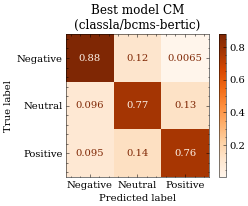

In [8]:
C_model_bertic = df.model_name == "classla/bcms-bertic"

subset = df[C_trained_on_train & C_evaled_on_test & C_model_bertic]
best_result = subset.iloc[subset.macroF1.argmax(), :]
y_true = best_result["y_true"]
y_pred = best_result["y_pred"]

import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", labels=["Negative", "Neutral", "Positive"],
   normalize="true"
   )

plt.title("Best model CM\n(classla/bcms-bertic)")
plt.show()


In [15]:
df.groupby(["model_name", "train_split", "eval_split"]).agg(
    [macroF1_stats, len]
)#.sort_values(by=("macroF1","macroF1_stats"), ascending=False)

macroF1     
                                              macroF1_stats  len
model_name          train_split eval_split                      
classla/bcms-bertic train       test        0.7837 ± 0.0125  6.0
                                test_HR     0.8143 ± 0.0148  6.0
                                test_SRB    0.7380 ± 0.0201  6.0
                    train_HR    test_HR     0.8020 ± 0.0103  6.0
                                test_SRB    0.7495 ± 0.0250  6.0
                    train_SRB   test_HR     0.8247 ± 0.0155  6.0
                                test_SRB    0.7553 ± 0.0128  6.0